# 0. Importing Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
datapath="./CC Data 2020.csv"
data = pd.read_csv(datapath)

D:\Anaconda\envs\xzy\lib\site-packages\IPython\core\interactiveshell.py:3145: DtypeWarning: Columns (9,10,11,12,13,14,15,16) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


# 1. Describe

## 1.1 Observation of dataset
The data given from the data holder collected the information when people use the system called 'Blackwood'. It combines 'Time', 'VistorID', 'ExternalID', 'LinkTitle', 'LinkType', 'ContentInfo', and two undescribed columns of data into a table.

In [2]:
print(data.head)

<bound method NDFrame.head of                     Time                             VisitorID  ExternalID  \
0       2020/10/30 13:16  9EDD833D-9D6B-46AC-A85E-DF21425162C4      8846.0   
1       2020/10/30 13:14  9EDD833D-9D6B-46AC-A85E-DF21425162C4      8846.0   
2       2020/10/30 13:14  9EDD833D-9D6B-46AC-A85E-DF21425162C4      8846.0   
3       2020/10/30 13:14  9EDD833D-9D6B-46AC-A85E-DF21425162C4      8846.0   
4       2020/10/30 13:01  679CBA7A-948B-4F2E-9432-002DDD5FFF8A         NaN   
...                  ...                                   ...         ...   
314761   2018/10/29 1:27  3FBBBB99-E67F-4511-B9B1-8F402B89DBE5      5107.0   
314762   2018/10/29 1:27  3FBBBB99-E67F-4511-B9B1-8F402B89DBE5      5107.0   
314763   2018/10/29 1:27  3FBBBB99-E67F-4511-B9B1-8F402B89DBE5      5107.0   
314764   2018/10/29 0:59  7B0FC8AD-6EF6-4760-A236-DB0BF969EED7      8639.0   
314765   2018/10/29 0:58  7B0FC8AD-6EF6-4760-A236-DB0BF969EED7      8639.0   

       Unnamed: 3             Unn

## 1.2 Check data size and range 
The original data has a shape of (314766,17).The range of 'Time' is from  '2018/10/29 0:58:00' to '2020/10/30 13:16:00'

## 1.3 Define the key value and find distinct users' number
Since the data holder suggested us to use 'VisitorID' as key value in the dataset, I checked the number of distinct 'VisitorID', which is 621, which menas there're 621 distinct users using this system.

In [3]:
print(data.groupby('VisitorID').nunique())

                                      Time  ExternalID  Unnamed: 3  \
VisitorID                                                            
0044DB0F-7F1C-49B9-8252-4EEF31091175     7           1           1   
011306E2-E334-4FDA-A51C-44604B5A866A     1           0           1   
03D4A1E0-E0B3-49D2-A222-D3DCDE621FAD    20           1           1   
0443B0BF-0240-4351-B092-9ED065B2CA66    30           1           1   
050B73F4-3EF0-46B6-B701-3210246DD348    44           0           1   
...                                    ...         ...         ...   
FE6B61E0-E2FD-4DA8-B080-D6A0443FA89E     1           0           1   
FE803DDC-DEBA-49F2-9927-9C743378E42E     3           0           1   
FF372199-2C04-4EC7-BF9A-9C12F6C7589E     8           0           1   
FFB3C6A3-8057-4308-83AF-A31DE1FAAD19    69           1           1   
FFB4F433-08A5-43A2-88A6-E635F0EBA0EF     5           1           1   

                                      Unnamed: 4  LinkTitle  LinkType  \
VisitorID       

## 1.4 The time frame
The time frame of the data is year/month/day 'space' hour/minute/second

# 2. Explore

## 2.1 Data Cleaning

### 2.1.1 Since only the first 8 columns are meaningful, there's no need to remain the other columns.

In [4]:
dataR = data.iloc[:,0:8]

### 2.1.2 Removing all invalid values of time

In [5]:

print(dataR.shape)
dataR = np.array(dataR)
# print(dataR[:,0][0])
# condition = np.where((dataR[:,0])[0] != '2')[0]
# dataR=dataR[condition]
# dataR = np.delete(dataR,condition)

for i in range(dataR.shape[0]):

    if(i+1<dataR.shape[0]):
#         print(dataR[i,:][0],dataR[i+1,:][0])
        if(dataR[i,:][0][0] != '2' and dataR[i+1,:][0][0] != '2'):
            dataR = np.delete(dataR,i+1,axis=0)
            dataR = np.delete(dataR,i,axis=0)
        elif(dataR[i,:][0][0] == '2' and dataR[i+1,:][0][0] != '2'):
            dataR = np.delete(dataR,i+1,axis=0)
        elif(dataR[i,:][0][0] != '2' and dataR[i+1,:][0][0] == '2'):
            dataR = np.delete(dataR,i,axis=0)


        
#     print(\n,dataR[i,:][0])
# dataT=np.reshape(dataT,(-1,8))

print(dataR.shape)



(314766, 8)
(314734, 8)


### 2.1.3 Assertion

In [6]:
import time
for i in range(dataR.shape[0]):
    timeA = time.strptime(dataR[i,0], "%Y/%m/%d %H:%M")
print('All of the time format is correct!')

All of the time format is correct!


## 2.2. Visualization

### 2.2.1 Activities Usage Trend over Time
Since our audiences are mainly the stakeholders, developers and product managers from Blackwood, we assume that they maybe wondering how different activities usage fluctuate over time. So, I'm going to illustrate this with line chart.

I'm going to analyze data in a specific time range, so I have to split the whole time range into diverse pieces. Since the whole time range is about 2 years long(from 2018.10 to 2020.10), I decided to make the process monthly, which is a natural way to present to the audiences.And since there are too many activities in the same chart, I will choose the top 10 popular activities to fill the chart.

#### 2.2.1.1 Coding

The top 10 popular activities are:  ['Entertainment' 'My Interests' 'YouTube' 'Google' 'My Music' 'Play Games'
 'Card Matching Games' 'Single Player Games' 'Videos' 'Patience']


<ipython-input-7-f02631d43f39>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2018.10','2018.10', '2019.04', '2019.09','2020.02','2020.06','2020.10'], rotation=30, fontsize='small')
<ipython-input-7-f02631d43f39>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2018.10','2018.10', '2019.04', '2019.09','2020.02','2020.06','2020.10'], rotation=30, fontsize='small')
<ipython-input-7-f02631d43f39>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2018.10','2018.10', '2019.04', '2019.09','2020.02','2020.06','2020.10'], rotation=30, fontsize='small')
<ipython-input-7-f02631d43f39>:82: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(['2018.10','2018.10', '2019.04', '2019.09','2020.02','2020.06','2020.10'], rotation=30, fontsize='small')
<ipython-input-7-f02631d43f39>:82: UserWarning: Fixe

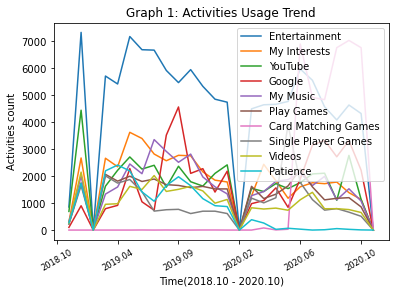

In [7]:
import time


#count unique activities
dictt1 = {}
for i in range(dataR.shape[0]):
    if(dataR[i,5] not in dictt1.keys()):
        dictt1[dataR[i,5]] = 1
    else:
        dictt1[dataR[i,5]] += 1
        
        

#filter the top 10 activities out
top = []
for i in range(10):
    m = max(dictt1.values())
    for key,value in dictt1.items():
        if(value == m):
            top = np.append(top,key)
#             print(key,value)
            dictt1[key] = 0
print('The top 10 popular activities are: ',top)   





#filter by month
size = [1,dataR.shape[0]]
timee = np.zeros(shape = size)
timeee = np.zeros(shape = size)


#transfer time 
for i in range(dataR.shape[0]):
    timeArray = time.strptime(dataR[i,0], "%Y/%m/%d %H:%M")
    timee[:,i] = timeArray.tm_mon
    timeee[:,i] = timeArray.tm_year
    

newData = np.hstack((dataR[:,5].reshape(-1,1),timee.reshape(-1,1),timeee.reshape(-1,1)))

sizee = [10,36]
cnt1 = np.zeros(shape = sizee)

#i represents the year
for i in [2018,2019,2020]:
    condition = np.where(newData[:,-1] == i)[0]
    yearData = newData[condition]
    yearData = yearData[:,:2]
    
#j represents the month
    for j in range(36):
        conditionn = np.where(yearData[:,-1] == j%12)[0]
        monData = yearData[conditionn]
        monData = monData[:,:1]
        for k in range(monData.shape[0]):
            for m in range(10):
                if(monData[k,0] == top[m]):
                    cnt1[m,(i-2018)*12+j%12] += 1
                    

#filter useless values
sizeee = [10,26]
cnt2 = np.zeros(shape = sizeee)


for i in range(cnt1.shape[0]):
    cnt2[i,:] = cnt1[i,10:]
    

#plot
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)
for i in range(cnt2.shape[0]):
    x = np.linspace(1,26, 26)
    ax.plot(x,cnt2[i,:],label = top[i])
    plt.legend()
    plt.title('Graph 1: Activities Usage Trend')
    plt.xlabel('Time(2018.10 - 2020.10)')
    ax.set_xticklabels(['2018.10','2018.10', '2019.04', '2019.09','2020.02','2020.06','2020.10'], rotation=30, fontsize='small')
    plt.ylabel('Activities count')
    



#### 2.2.1.2 Story Telling
As we can see from the chart, we can know the 10 most popular activities and how their usage distribute during the whole time. Also, there're some prominent features I'd like to tell.

The users did not like to use the platform during every December, maybe they were busy planning their Christmas Holiday.

The users barely play 'Card Matching Games' before 2020.04, after which it has been quite a popular activity among the users. I assume the reason could be the game hasn't been published on the platform before that time.

It's quite clear that in the whole time, users tend to do 'Entertainment' the most.

### 2.2.2  Fluctuation of Activities' Usage with the Whole Dataset Splited into 24 Hours.
I was curious about the pattern describing when people use the platform mostly and minimally within 24 hours. So, I'm going to make a process of satisitic to tell the story in a line chart. 

#### 2.2.2.1 Coding

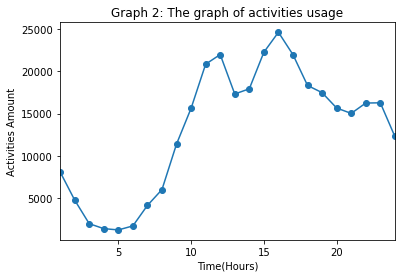

In [8]:
#Initialize the statistic data
shape=[1,24]
count=np.zeros(shape=shape)


#Filtering the hours from original time
for i in range(dataR.shape[0]):
    if(dataR[i,0][6] == '/'):
        #1-digit month
        if(dataR[i,0][8] == ' '):
            #1-digit day
            if(dataR[i,0][10] == ':'):
                #1-digit hour
                count[:,int(dataR[i,0][9])]+=1
            else:
                #2-digits hour 
                count[:,int(dataR[i,0][9:11])]+=1
        else:
            #2-digits day
            if(dataR[i,0][11] == ':'):
                #1-digit hour
                count[:,int(dataR[i,0][10])]+=1
            else:
                #2-digits hour 
                count[:,int(dataR[i,0][10:12])]+=1
    else:
        #2-digits month
        if(dataR[i,0][9] == ' '):
            #1-digit day
            if(dataR[i,0][11] == ':'):
                #1-digit hour
                count[:,int(dataR[i,0][10])]+=1
            else:
                #2-digits hour 
                count[:,int(dataR[i,0][10:12])]+=1
        else:
            #2-digits day
            if(dataR[i,0][12] == ':'):
                #1-digit hour
                count[:,int(dataR[i,0][11])]+=1
            else:
                #2-digits hour 
                count[:,int(dataR[i,0][11:13])]+=1

#plot
x = np.linspace(1,24,num = 24)
plt.scatter(x,count[0])
plt.plot(x,count[0])
plt.xlabel('Time(Hours)')
plt.ylabel('Activities Amount')
plt.title('Graph 2: The graph of activities usage')
plt.xlim(1,24)
plt.show()




#### 2.2.2.2 Story Telling
This line chart illustrates the fluctuation of activities' usage with the whole dataset splited into 24 hours. It's quite clear that the highest value is 24623 at 16 o'clock, whilst the lowest value of 1250 occurs at 5 o'clock And we can tell that there's a huge decline from 23 o'clock to 5 o'clock, since it's sleep time for people generally. And after 5 o'clock,the value rises till 12 o'clock at 21987, after which has a temporary decline within 2 hours since it's time for lunch or nap break.Then, it climbs to the peak at 16 o'clock, after which it turns to decline untill it fluctuates slightly at 21 o'clock since they may want to do some offline social activities around afternoon.And a sharp decrease shows at 23 o'clock, so I assume it's time when most of the users go to bed.   

### 2.2.3 Word clouds for activities during morning, noon and evening.
After knowing the pattern above, I think maybe it's better to understand what activities do users use mostly during 3 special duration(6-8 o'clock, 11-13 o'clock, 19-21 o'clock) within one day. Now I'm going to tell this story with 3 seperate word clouds.

#### 2.2.3.1 Coding

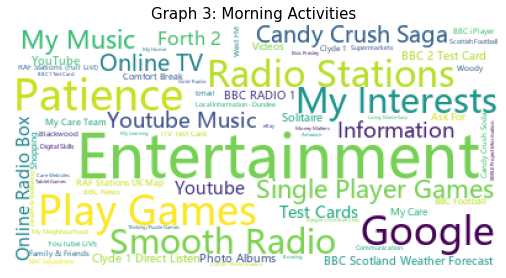

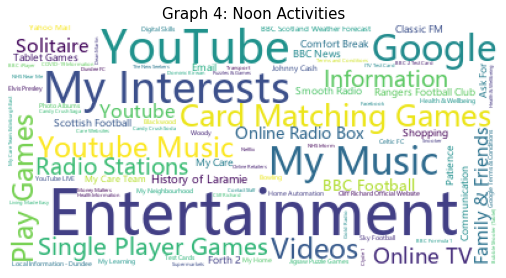

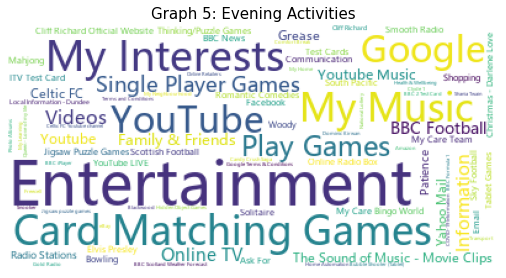

In [9]:
import time
#Initialize the output
dataM = {}
dataN = {}
dataE = {}
size = [1,dataR.shape[0]]
timee = np.zeros(shape = size)



#Filter the data


#transfer time into a format and store it into 'timee'
for i in range(dataR.shape[0]):
    timeArray = time.strptime(dataR[i,0], "%Y/%m/%d %H:%M")
    timee[:,i] = timeArray.tm_hour
    
#Reconstruct a matric representing the activities and time; store it into 'dataTT'
dataT = dataR[:,5]
dataTT = np.hstack((dataT.reshape(-1,1),timee.reshape(-1,1)))





#morning
# =====================morning==========================


#Filter the 'dataTT' with time of 6 and 7, store them into 'dataTTM1' and 'dataTTM2'
conditionM1 = np.where(dataTT[:,-1]==6)[0]
dataTTM1 = dataTT[conditionM1]
conditionM2 = np.where(dataTT[:,-1]==7)[0]
dataTTM2 = dataTT[conditionM2] 


#Get the count of activities with time of 6 and 7, store them into 'dataM' and 'dataMT'
for i in range(dataTTM1.shape[0]):
    if(dataTTM1[i,0] not in dataM.keys()):
        dataM[dataTTM1[i,0]] = dataTTM1[i,-1]
    else:
        dataM[dataTTM1[i,0]] += dataTTM1[i,-1]
for i in dataM.keys():
    dataM[i]/=6
    
dataMT = {}
for i in range(dataTTM2.shape[0]):
    if(dataTTM2[i,0] not in dataMT.keys()):
        dataMT[dataTTM2[i,0]] = dataTTM2[i,-1]
    else:
        dataMT[dataTTM2[i,0]] += dataTTM2[i,-1]
for i in dataMT.keys():
    dataMT[i]/=7
    

#Reconstruct the final result representing the activities and its counts, store them into 'dataM'
for i in dataMT.keys():
    for j in dataM.keys():
        if(i == j):
            dataM[i] = dataM[i]+dataMT[i]
# print(dataM)
# =====================noon==========================

    
    
    

#noon
conditionN1 = np.where(dataTT[:,-1]==11)[0]
dataTTN1 = dataTT[conditionN1]
conditionN2 = np.where(dataTT[:,-1]==12)[0]
dataTTN2 = dataTT[conditionN2]



for i in range(dataTTN1.shape[0]):
    if(dataTTN1[i,0] not in dataN.keys()):
        dataN[dataTTN1[i,0]] = dataTTN1[i,-1]
    else:
        dataN[dataTTN1[i,0]] += dataTTN1[i,-1]
for i in dataN.keys():
    dataN[i]/=11
    
dataNT = {}
for i in range(dataTTN2.shape[0]):
    if(dataTTN2[i,0] not in dataNT.keys()):
        dataNT[dataTTN2[i,0]] = dataTTN2[i,-1]
    else:
        dataNT[dataTTN2[i,0]] += dataTTN2[i,-1]
for i in dataNT.keys():
    dataNT[i]/=12
for i in dataNT.keys():
    for j in dataN.keys():
        if(i == j):
            dataN[i] = dataN[i]+dataNT[i]
# print(dataN)
# =====================evening==========================


#evening
conditionE1 = np.where(dataTT[:,-1]==19)[0]
dataTTE1 = dataTT[conditionE1]
conditionE2 = np.where(dataTT[:,-1]==20)[0]
dataTTE2 = dataTT[conditionE2]




for i in range(dataTTE1.shape[0]):
    if(dataTTE1[i,0] not in dataE.keys()):
        dataE[dataTTE1[i,0]] = dataTTE1[i,-1]
    else:
        dataE[dataTTE1[i,0]] += dataTTE1[i,-1]
for i in dataE.keys():
    dataE[i]/=19
    
dataET = {}
for i in range(dataTTE2.shape[0]):
    if(dataTTE2[i,0] not in dataET.keys()):
        dataET[dataTTE2[i,0]] = dataTTE2[i,-1]
    else:
        dataET[dataTTE2[i,0]] += dataTTE2[i,-1]
for i in dataET.keys():
    dataET[i]/=20
for i in dataET.keys():
    for j in dataE.keys():
        if(i == j):
            dataE[i] = dataE[i]+dataET[i]
# print(dataE)



#plot

from wordcloud import WordCloud



wc1 = WordCloud(font_path='/font/msyh.ttc',background_color='white').generate_from_frequencies(dataM)

plt.figure(figsize=(30,30)) 
plt.subplot(1,3,1)
plt.imshow(wc1)
plt.axis('off')
plt.title('Graph 3: Morning Activities',fontsize=15)
plt.show()




wc2 = WordCloud(font_path='/font/msyh.ttc',background_color='white').generate_from_frequencies(dataN)
plt.figure(figsize=(30,30)) 
plt.subplot(1,3,2)
plt.imshow(wc2)
plt.axis('off')
plt.title('Graph 4: Noon Activities',fontsize=15)
plt.show()


wc3 = WordCloud(font_path='/font/msyh.ttc',background_color='white').generate_from_frequencies(dataE)
plt.figure(figsize=(30,30)) 
plt.subplot(1,3,3)
plt.imshow(wc3)
plt.axis('off')
plt.title('Graph 5: Evening Activities',fontsize=15)
plt.show()




#### 2.2.3.2 Story Telling 
As we can see from the three word clouds above, it's clear that 'Entertainment' is always the most popular activity among all the time range including morning, noon and evening. However, there're some slight differences among them.

For instance, users barely watch 'YouTube' in the morning, but they would watch it more frequently during noon and evening. I assume maybe it's because of the time spent on dinner and lunch are much longer than it on breakfast, and they may fancy watching videos when they eating. It could also be the result of people enjoying videos before taking nap after lunch and going to bed at night.

Also, it's clear to see that they tend to listen to radio('Smooth Radio' and 'Radio Stations') more often during the morning time than the noon and evening.Maybe it's caused by the fact that listening to radio is a much more convenient way to get information in the busy morning. Or it's just a habit that the elders have.


### 2.2.4 Distribution of Activities Usage During Morning, Noon and Evening.
After what I've done above, I've split the whole day into 3 specific time duration(morning, noon and evening). I assume it would be interesting if we can know how the activities usage distribute in these duration. I'm going to illustrate this by drawing a pie chart.

#### 2.2.4.1 Coding

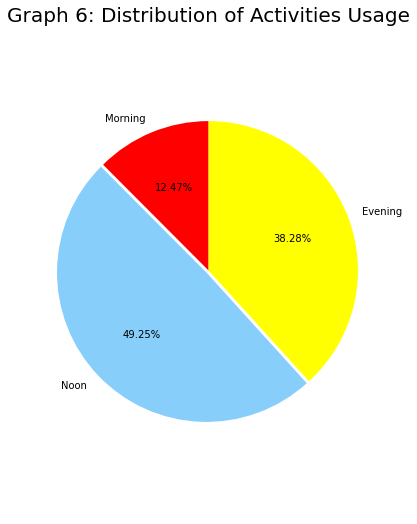

In [10]:
#count the numbers of different time durations' activities usage.
valueM = 0
valueN = 0
valueE = 0
for key in dataM.keys():
    valueM += dataM[key]
for key in dataN.keys():
    valueN += dataN[key]
for key in dataE.keys():
    valueE += dataE[key]
    
    
#plot

plt.figure(figsize=(6,9)) 
labels = ['Morning','Noon','Evening']
sizes = [valueM, valueN, valueE]
colors = ['red','lightskyblue','yellow'] 
explode = (0,0.02,0)
patches,text1,text2 = plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct = '%3.2f%%', shadow = False,startangle =90, pctdistance = 0.6)
plt.axis('equal')
plt.title('Graph 6: Distribution of Activities Usage', fontsize = 20)
plt.show()





#### 2.2.4.2 Story telling
From the pie chart, we can tell that the most of activities happened during the noon time(49.25%), and the fewest ones happened in the morning(12.47%).Maybe this is because of people are more excited during the day time, whilst they are too busy to look at the platform in morning.

# 3. Reflect and Hypothesis


## 3.1 Reflection
As we were informed, the 'Blackwood Clevercogs' is a platform providing online entertainment games, music and information with older people. And the dataset provided by our data holder is about how the users explore and interact with it. After the exploration, I found that:

1. The most 10 popular activities among users show diverse trend duting the whole time(from 2018.10 to 2020.10), and 'Entertainment' has always been the users's favorite activity until 'Card Matching Game' increased sharply in 2020.04. I assume that 'Card Matching Game' is really popular among the users in past half year, which means it's a really well-designed activity for the users.
2. The users tend to be more active on the platform during the period time from 10:00 AM to 8:00 PM, which means this platform is used most frequently during the regular activity time instead of the special time like mid-night.
3. The users prefer listening to radio instead of watching YouTube during morning, and 'Entertainment' is always their favorite during noon and evening. Also, it's clear that 'Entertainment' is always the most popular activity among all the time.
4. The most activities(49.25%) took place around noon, whilst the fewest ones(12.47%) happened in the morning.


## 3.2 Hypothesis
1. With the rise of 'Card Matching Game', there's a decrease of 'Entertainment', so I guess it may be the replacement of 'Entertainment'. This could be verified by interviewing the designers of 'Card Matching Game', or calculating the correlation coeffient with euclidean distance/cosine distance between them.
2. Based on the fact that the users tend to listen to radio in the morning, which is more like a habit of the elders, I assume that the most of users in the platform are old. To get this tested, I will join the other table which includes the information of users' age with 'VisitorID'  to analyze the distribution of users' age. (I'm aware of that this platform was designed for the older people in the first place, but we can't say that the most users of the platform are old people, we still need to verify if the true data fits the design aim).
3. Since the users behaved differently in seperate months, I assume that the distribution of activities usage within one day ralates to the  curent month or several months(seasons). We can test this by filtering data in different seasons, and find the features within one day. 
4. Also, the users' behaviour may relate to the season. For example, maybe they will spend more time on the platform during noon in the summer(June in the North Hemisphere) since it's really hot outside. However, they may act differently in the winter. We can test this by choosing specific data within pointed time(seasons), and plot the pie chart to observe the proportion of 3 duration(morning, noon, evening).